In [2]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [6]:
path= "/Users/hongyoujin/Documents/기타/Jenga/data/" # 파일 경로

df_trade= pd.read_csv(f"{path}전세가율.csv")
df1 = df_trade.drop('IDX',axis=1)  # 전세가율 R
df_updown = pd.read_csv(f"{path}매매증감률.csv")
df2 = df_updown.drop('IDX',axis=1) # 매매증감률 C
df_non = pd.read_csv(f"{path}미분양률.csv")
df3 = df_non.drop('IDX',axis=1) # 미분양률 U 
df_living= pd.read_csv(f"{path}매매거래율.csv")
df4 = df_living.drop('IDX',axis=1) # 거래율
df_newapt = pd.read_csv(f"{path}입주물량률.csv")
df5 = df_newapt.drop('IDX',axis=1) # 입주물량율 N

In [8]:
grouped = pd.read_csv("/Users/hongyoujin/Documents/기타/Jenga/GROUP_ADDR.csv", encoding='euc-kr')
grouped

,YYYYMM,ADDR_1,ADDR_2,ADDR_12,TOP_CNT,AVG_T_PRICE,AVG_R_PRICE,T_LEVEL
0,202401,서울특별시,서초구,서울특별시 서초구,17,279265,128017,1
1,202401,서울특별시,강남구,서울특별시 강남구,20,260456,117299,1
2,202401,서울특별시,종로구,서울특별시 종로구,3,177000,102333,1
3,202401,서울특별시,마포구,서울특별시 마포구,15,157893,85651,1
4,202401,서울특별시,송파구,서울특별시 송파구,20,156763,77109,1
...,...,...,...,...,...,...,...,...
161,202401,전라북도,남원시,전라북도 남원시,4,23350,14000,10
162,202401,충청북도,음성군,충청북도 음성군,4,23231,14900,10
163,202401,경상북도,영천시,경상북도 영천시,4,22379,17738,10
164,202401,전라남도,광양시,전라남도 광양시,6,21833,18250,10


In [10]:
answer = pd.read_csv(f"{path}(검증용)매매전세_증감률.csv")
# answer[(answer['ADDR_1']=='대구광역시')&(answer['ADDR_2']=='동구')]
answer['ADDR_2'].value_counts()
# 강릉시, 동해시, 삼척시, 속초시, 원주시, 춘천시 를 대상으로만 우선 해보는 거지

ADDR_2
동구           1158
중구            965
서구            965
북구            772
남구            772
             ... 
양산시           193
진주시           193
창녕군           193
창원시 마산합포구     193
충주시           193
Name: count, Length: 182, dtype: int64

In [11]:
df_living['ADDR_2'].value_counts()
df_living[(df_living['ADDR_2']=='동구')&(df_living['ADDR_1']=='대구광역시')]

,IDX,YYYYMM,ADDR_1,ADDR_2,AFFECTED_APT,TOTAL_T_CNT,SUM_APT_CNT,T_CNT_RATE,2M_T_CNT_RATE,LAST_UPDATE_TIME
94,95,202401,대구광역시,동구,15,20,23499,0.085,0.094,2024-01-29 12:47:12
296,297,202312,대구광역시,동구,15,24,23499,0.102,0.081,2024-01-29 12:47:12
498,499,202311,대구광역시,동구,15,14,23499,0.060,0.087,2024-01-29 12:47:12
700,701,202310,대구광역시,동구,15,27,23499,0.115,0.117,2024-01-29 12:47:12
902,903,202309,대구광역시,동구,15,28,23499,0.119,0.128,2024-01-29 12:47:12
...,...,...,...,...,...,...,...,...,...,...
38070,38071,200805,대구광역시,동구,7,11,12537,0.088,0.171,2024-01-29 12:47:12
38272,38273,200804,대구광역시,동구,7,32,12537,0.255,0.291,2024-01-29 12:47:12
38474,38475,200803,대구광역시,동구,7,41,12537,0.327,0.267,2024-01-29 12:47:12
38676,38677,200802,대구광역시,동구,7,26,12537,0.207,0.199,2024-01-29 12:47:12


In [12]:
df_trade.head()
df_trade[(df_trade['ADDR_2']=='동구')&(df_trade['ADDR_1']=='대구광역시')]

,IDX,YYYYMM,ADDR_1,ADDR_2,AFFECTED_APT,AVG_T_PRICE,AVG_R_PRICE,TR_RATE,LAST_UPDATE_TIME
70,71,201102,대구광역시,동구,4,20440.0,13000,63.60,2024-01-29 12:49:42
237,238,201103,대구광역시,동구,5,19652.0,12367,62.93,2024-01-29 12:49:42
413,414,201104,대구광역시,동구,6,18449.0,13083,70.92,2024-01-29 12:49:42
593,594,201105,대구광역시,동구,8,18138.0,11531,63.57,2024-01-29 12:49:42
775,776,201106,대구광역시,동구,8,18709.0,11168,59.69,2024-01-29 12:49:42
...,...,...,...,...,...,...,...,...,...
29840,29841,202309,대구광역시,동구,15,29714.0,20115,67.70,2024-01-29 12:49:42
30042,30043,202310,대구광역시,동구,15,29918.0,19422,64.92,2024-01-29 12:49:42
30244,30245,202311,대구광역시,동구,15,29992.0,19889,66.31,2024-01-29 12:49:42
30446,30447,202312,대구광역시,동구,15,29901.0,19669,65.78,2024-01-29 12:49:42


In [13]:
df_updown.head()
df_updown[(df_updown['ADDR_2']=='동구')&(df_updown['ADDR_1']=='대구광역시')]

,IDX,YYYYMM,ADDR_1,ADDR_2,AFFECTED_APT,AVG_T_PRICE,1M_CHANGE_RATE,3M_CHANGE_RATE,6M_CHANGE_RATE,9M_CHANGE_RATE,12M_CHANGE_RATE,LAST_UPDATE_TIME
18142,18143,200801,대구광역시,동구,7,NaN,NaN,NaN,NaN,NaN,NaN,2024-01-29 12:51:32
18143,18144,200802,대구광역시,동구,7,14250.0,NaN,NaN,NaN,NaN,NaN,2024-01-29 12:51:32
18144,18145,200803,대구광역시,동구,7,14347.0,0.68,NaN,NaN,NaN,NaN,2024-01-29 12:51:32
18145,18146,200804,대구광역시,동구,7,14746.0,2.78,NaN,NaN,NaN,NaN,2024-01-29 12:51:32
18146,18147,200805,대구광역시,동구,7,15478.0,4.96,8.62,NaN,NaN,NaN,2024-01-29 12:51:32
...,...,...,...,...,...,...,...,...,...,...,...,...
18330,18331,202309,대구광역시,동구,15,29714.0,-1.71,-6.05,-10.61,-13.39,-17.35,2024-01-29 12:51:32
18331,18332,202310,대구광역시,동구,15,29918.0,0.69,-2.05,-6.90,-11.49,-16.79,2024-01-29 12:51:32
18332,18333,202311,대구광역시,동구,15,29992.0,0.25,-0.79,-3.93,-11.29,-15.29,2024-01-29 12:51:32
18333,18334,202312,대구광역시,동구,15,29901.0,-0.30,0.63,-5.46,-10.04,-12.84,2024-01-29 12:51:32


In [14]:
df_non.head()
df_non[(df_non['ADDR_2']=='동구')&(df_non['ADDR_1']=='대구광역시')]

,IDX,YYYYMM,ADDR_1,ADDR_2,UNSOLD_CNT,POP_30_59,UNSOLD_RATE,2M_UNSOLD_RATE,LAST_UPDATE_TIME
192,193,202109,대구광역시,동구,1506,149898,1.00,0.50,2024-01-26 13:43:20
261,262,202108,대구광역시,동구,1637,150068,1.09,0.56,2024-01-26 13:43:20
597,598,202107,대구광역시,동구,747,150257,0.50,0.70,2024-01-26 13:43:20
905,906,202106,대구광역시,동구,848,150540,0.56,0.51,2024-01-26 13:43:20
1073,1074,202105,대구광역시,동구,1052,151188,0.70,0.03,2024-01-26 13:43:20
...,...,...,...,...,...,...,...,...,...
38150,38151,200805,대구광역시,동구,3034,157165,1.93,1.49,2024-01-26 13:43:20
38242,38243,200804,대구광역시,동구,2619,157319,1.66,1.36,2024-01-26 13:43:20
38437,38438,200803,대구광역시,동구,2343,157505,1.49,1.37,2024-01-26 13:43:20
38837,38838,200802,대구광역시,동구,2147,157915,1.36,NaN,2024-01-26 13:43:20


In [15]:
df_updown.columns
df_non.columns

Index(['IDX', 'YYYYMM', 'ADDR_1', 'ADDR_2', 'UNSOLD_CNT', 'POP_30_59',
       'UNSOLD_RATE', '2M_UNSOLD_RATE', 'LAST_UPDATE_TIME'],
      dtype='object')

In [16]:
common_columns = set(df_updown.columns) & set(df_non.columns) & set(df_living.columns) & set(df_trade.columns)
common_columns

{'ADDR_1', 'ADDR_2', 'IDX', 'LAST_UPDATE_TIME', 'YYYYMM'}

In [32]:
df5=df5.drop("LAST_UPDATE_TIME",axis=1)

In [33]:
merged_df = pd.merge(df1, df2, on=['YYYYMM', 'ADDR_1', 'ADDR_2'], how='outer')
merged_df = pd.merge(merged_df, df3, on=['YYYYMM', 'ADDR_1', 'ADDR_2'], how='outer')
merged_df = pd.merge(merged_df, df4, on=['YYYYMM', 'ADDR_1', 'ADDR_2'], how='outer')
merged_df = pd.merge(merged_df, df5, on=['YYYYMM', 'ADDR_1', 'ADDR_2'], how='outer')
merged_df


,YYYYMM,ADDR_1,ADDR_2,AFFECTED_APT_x,AVG_T_PRICE_x,AVG_R_PRICE,TR_RATE,AFFECTED_APT_y,AVG_T_PRICE_y,1M_CHANGE_RATE,...,SUM_APT_CNT_x,T_CNT_RATE,2M_T_CNT_RATE,SUM_APT_CNT_y,POP_30_59_y,SUM_APT_CNT_30M,SUM_POP_30_59_30M,RATE_NEW_CNT_30M,StartYYYYMM,EndYYYYMM
0,201102,강원특별자치도,속초시,2.0,16000.0,9750.0,60.94,4.0,14263.0,0.71,...,4154.0,0.217,0.193,0.0,40807.0,912.0,1224210.0,0.0745,201101.0,201306.0
1,201102,강원특별자치도,원주시,12.0,17031.0,10100.0,59.30,16.0,16815.0,-0.53,...,33271.0,0.508,0.591,0.0,151987.0,1555.0,4559610.0,0.0341,201101.0,201306.0
2,201102,강원특별자치도,철원군,1.0,14961.0,5000.0,33.42,2.0,13906.0,0.18,...,1456.0,0.206,0.137,0.0,20968.0,0.0,629040.0,0.0000,NaN,NaN
3,201102,강원특별자치도,춘천시,5.0,23325.0,13490.0,57.83,12.0,23007.0,3.53,...,31359.0,0.290,0.309,0.0,126043.0,2204.0,3781290.0,0.0583,201101.0,201306.0
4,201102,강원특별자치도,홍천군,1.0,15633.0,8167.0,52.24,1.0,15633.0,-9.11,...,401.0,0.998,1.621,0.0,31616.0,211.0,948480.0,0.0222,201101.0,201306.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50620,200801,경상남도,진해시,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,76920.0,0.0,2307600.0,0.0000,NaN,NaN
50621,200801,경상북도,군위군,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,10165.0,18.0,304950.0,0.0059,200712.0,201005.0
50622,200801,충청남도,당진군,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,58915.0,0.0,1767450.0,0.0000,NaN,NaN
50623,200801,충청남도,연기군,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,34618.0,0.0,1038540.0,0.0000,NaN,NaN


In [35]:
merged_df['ADDR_12']=merged_df['ADDR_1']+" "+merged_df['ADDR_2']

In [36]:
groups = {}
groups = dict(zip(grouped['ADDR_12'], grouped['T_LEVEL']))

def grouping(x):
    return groups.get(x)

merged_df['groups'] = merged_df['ADDR_12'].apply(grouping)

In [37]:
groups['강원특별자치도 춘천시']  # 강릉시, 동해시, 삼척시, 속초시, 원주시, 춘천시

7

In [38]:
all = pd.merge(merged_df, answer, on=['YYYYMM', 'ADDR_1', 'ADDR_2'], how='outer') # 강릉시, 

In [39]:
merged_df.sort_values('YYYYMM')
merged_df['ADDR_2'].value_counts().head(10)
# 강릉시, 속초시, 원주시, 동해시, 삼척시, 동구, 중구, 춘천시, 서구, 북구, 남구, 강서구, 동대문구, 강남구, 노원구, 금천구, 구로구, 광진구, 관악구, 강북구
# RTCNU 의 값을 구하는 것

ADDR_2
동구     1158
중구     1157
서구      965
남구      772
북구      772
강서구     386
고성군     385
익산시     193
순천시     193
여수시     193
Name: count, dtype: int64

In [56]:
answer

,IDX,YYYYMM,ADDR_1,ADDR_2,TOP_CNT,AVG_T_PRICE,AVG_R_PRICE,T_CHANGE_RATE,R_CHANGE_RATE,SUM_T_CNT,SUM_R_CNT,LAST_UPDATE_TIME
0,1,200801,강원특별자치도,강릉시,9,NaN,NaN,NaN,NaN,9,0,2024-01-29 12:42:26
1,2,200802,강원특별자치도,강릉시,9,8239.0,NaN,NaN,NaN,12,0,2024-01-29 12:42:26
2,3,200803,강원특별자치도,강릉시,9,8435.0,NaN,2.38,NaN,13,0,2024-01-29 12:42:26
3,4,200804,강원특별자치도,강릉시,9,8471.0,NaN,0.42,NaN,15,0,2024-01-29 12:42:26
4,5,200805,강원특별자치도,강릉시,9,8592.0,NaN,1.43,NaN,10,0,2024-01-29 12:42:26
...,...,...,...,...,...,...,...,...,...,...,...,...
38981,38982,202309,충청북도,충주시,9,23461.0,18889.0,-2.20,-3.05,9,4,2024-01-29 12:42:26
38982,38983,202310,충청북도,충주시,9,24047.0,19011.0,2.50,0.65,11,3,2024-01-29 12:42:26
38983,38984,202311,충청북도,충주시,9,23628.0,19011.0,-1.74,0.00,6,1,2024-01-29 12:42:26
38984,38985,202312,충청북도,충주시,9,24956.0,19000.0,5.62,-0.06,6,1,2024-01-29 12:42:26


(예시) 강릉시 - 6

In [45]:
all[all['groups']==1].isnull().sum()

YYYYMM                 0
ADDR_1                 0
ADDR_2                 0
AFFECTED_APT_x       629
AVG_T_PRICE_x        706
AVG_R_PRICE_x        629
TR_RATE              706
AFFECTED_APT_y         0
AVG_T_PRICE_y        132
1M_CHANGE_RATE       149
3M_CHANGE_RATE       183
6M_CHANGE_RATE       234
9M_CHANGE_RATE       285
12M_CHANGE_RATE      336
UNSOLD_CNT           479
POP_30_59_x          479
UNSOLD_RATE          479
2M_UNSOLD_RATE       513
AFFECTED_APT           0
TOTAL_T_CNT            0
SUM_APT_CNT_x          0
T_CNT_RATE             0
2M_T_CNT_RATE          0
SUM_APT_CNT_y         17
POP_30_59_y           17
SUM_APT_CNT_30M       17
SUM_POP_30_59_30M     17
RATE_NEW_CNT_30M      17
StartYYYYMM           29
EndYYYYMM             29
ADDR_12                0
groups                 0
IDX                    0
TOP_CNT                0
AVG_T_PRICE          132
AVG_R_PRICE_y        629
T_CHANGE_RATE        149
R_CHANGE_RATE        646
SUM_T_CNT              0
SUM_R_CNT              0


In [37]:
all.columns

Index(['YYYYMM', 'ADDR_1', 'ADDR_2', 'AFFECTED_APT_x', 'AVG_T_PRICE_x',
       'AVG_R_PRICE', 'TR_RATE', 'AFFECTED_APT_y', 'AVG_T_PRICE_y',
       '1M_CHANGE_RATE', '3M_CHANGE_RATE', '6M_CHANGE_RATE', '9M_CHANGE_RATE',
       '12M_CHANGE_RATE', 'UNSOLD_CNT', 'POP_30_59_x', 'UNSOLD_RATE',
       '2M_UNSOLD_RATE', 'AFFECTED_APT', 'TOTAL_T_CNT', 'SUM_APT_CNT_x',
       'T_CNT_RATE', '2M_T_CNT_RATE', 'SUM_APT_CNT_y', 'POP_30_59_y',
       'SUM_APT_CNT_30M', 'SUM_POP_30_59_30M', 'RATE_NEW_CNT_30M',
       'StartYYYYMM', 'EndYYYYMM', 'ADDR_12', 'groups', 'IDX', 'AVG_T_PRICE',
       'TRD_CHANGE_RATE'],
      dtype='object')

In [57]:
group1 =all[all['groups']==1]
# RTCNU 
# 전세가율, 거래율, 매매증감률, 입주물량률, 미분양률
# TR rate: 전세가율

In [58]:
group1_cleaned = group1.dropna()

In [62]:
group1_cleaned.columns

Index(['YYYYMM', 'ADDR_1', 'ADDR_2', 'AFFECTED_APT_x', 'AVG_T_PRICE_x',
       'AVG_R_PRICE_x', 'TR_RATE', 'AFFECTED_APT_y', 'AVG_T_PRICE_y',
       '1M_CHANGE_RATE', '3M_CHANGE_RATE', '6M_CHANGE_RATE', '9M_CHANGE_RATE',
       '12M_CHANGE_RATE', 'UNSOLD_CNT', 'POP_30_59_x', 'UNSOLD_RATE',
       '2M_UNSOLD_RATE', 'AFFECTED_APT', 'TOTAL_T_CNT', 'SUM_APT_CNT_x',
       'T_CNT_RATE', '2M_T_CNT_RATE', 'SUM_APT_CNT_y', 'POP_30_59_y',
       'SUM_APT_CNT_30M', 'SUM_POP_30_59_30M', 'RATE_NEW_CNT_30M',
       'StartYYYYMM', 'EndYYYYMM', 'ADDR_12', 'groups', 'IDX', 'TOP_CNT',
       'AVG_T_PRICE', 'AVG_R_PRICE_y', 'T_CHANGE_RATE', 'R_CHANGE_RATE',
       'SUM_T_CNT', 'SUM_R_CNT', 'LAST_UPDATE_TIME'],
      dtype='object')

In [141]:
X = group1_cleaned[['AFFECTED_APT_x', 'AVG_T_PRICE_x',
       'AVG_R_PRICE_x', 'TR_RATE', 'AFFECTED_APT_y', 'AVG_T_PRICE_y',
       '1M_CHANGE_RATE', '3M_CHANGE_RATE', '6M_CHANGE_RATE', '9M_CHANGE_RATE',
       '12M_CHANGE_RATE', 'UNSOLD_CNT', 'POP_30_59_x', 'UNSOLD_RATE',
       '2M_UNSOLD_RATE', 'AFFECTED_APT', 'TOTAL_T_CNT', 'SUM_APT_CNT_x',
       'T_CNT_RATE', '2M_T_CNT_RATE', 'SUM_APT_CNT_y', 
       'SUM_APT_CNT_30M', 'SUM_POP_30_59_30M', 'RATE_NEW_CNT_30M',
       'TOP_CNT','AVG_T_PRICE',]]


y = group1_cleaned['T_CHANGE_RATE']

In [124]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import mean_squared_error


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic Regression

In [142]:
y = np.where(y > 0, 1, 0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 로지스틱 회귀
model = LogisticRegression(max_iter=100)
model.fit(X_train, y_train)


LogisticRegression()

In [143]:
# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

Accuracy: 0.6763285024154589


In [144]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']  # These solvers support both l1 and l2 penalties
}

# Create grid search object
clf = GridSearchCV(LogisticRegression(max_iter=1000), param_grid=param_grid, cv=5, scoring='accuracy', verbose=1)

# Fit on data
clf.fit(X_train, y_train)

# Best parameters and best score
print("Best Parameters:", clf.best_params_)
print("Best Score:", clf.best_score_)

# Evaluate on the test set
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Test Accuracy: {accuracy}')


Fitting 5 folds for each of 80 candidates, totalling 400 fits


/Users/hongyoujin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hongyoujin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hongyoujin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hongyoujin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hongyoujin/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hongyoujin/anaconda3/lib/python3.

Best Parameters: {'C': 11.288378916846883, 'penalty': 'l1', 'solver': 'liblinear'}
Best Score: 0.9993957703927492
Test Accuracy: 0.9975845410628019


/Users/hongyoujin/anaconda3/lib/python3.11/site-packages/sklearn/svm/_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [147]:
# Assuming 'model' is your fitted Logistic Regression model
coefficients = model.coef_[0]

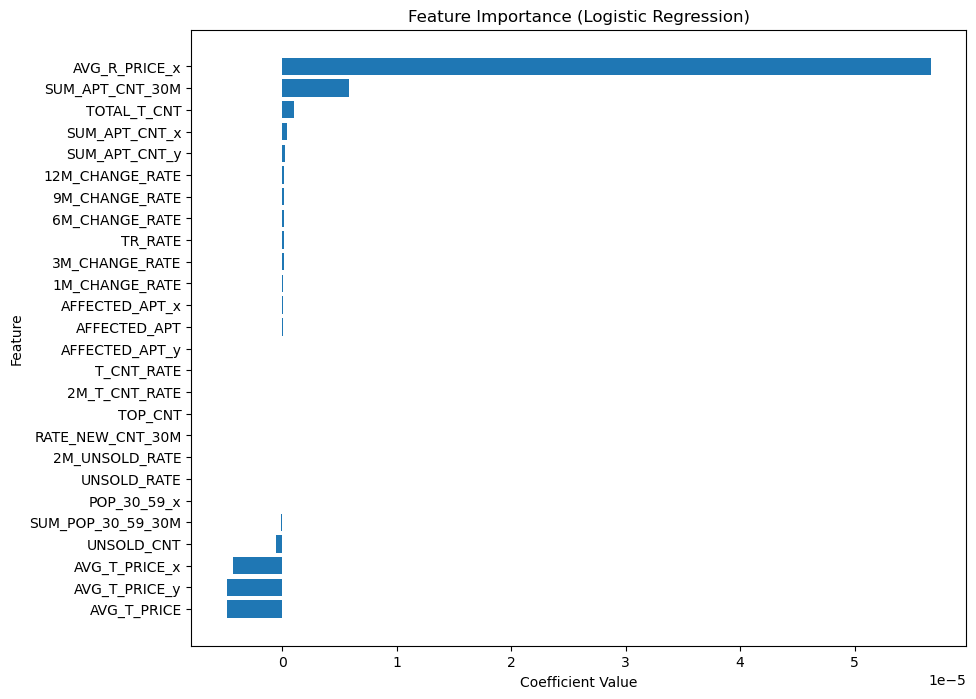

In [148]:
# Assuming 'X' is your feature matrix and you have feature names available
feature_names = X.columns

# Sorting the features by their coefficient values
sorted_idx = np.argsort(coefficients)

# Creating a horizontal bar plot
plt.figure(figsize=(10, 8))
plt.title("Feature Importance (Logistic Regression)")
plt.barh(range(len(sorted_idx)), coefficients[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), feature_names[sorted_idx])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.show()
